#Data Exploration and Preparation for Football Results Eredivisie 2016/2017

Sections

[1. Get Fixtures for Eredivisie 2016/2017](#get-fixtures)

[2. Get Stadiums](#get-stadiums)

[3. Plot Fixtures on a Map](#map-fixtures)

[4. Get Week-by-Week League Standings](#league-standings)


Note: used http://sebastianraschka.com/Articles/2014_ipython_internal_links.html for creation of table of contents

<a id="get-fixtures"/>

#Get Fixtures for Eredivisie 2016/2017

Fixture data is fetched from a Football Data API - home at [http://api.football-data.org/index]

##Get a list of all competitions.

In [30]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
# included the above in the first cell because of http://stackoverflow.com/questions/19410042/how-to-make-ipython-notebook-matplotlib-plot-inline

import pandas as pd
import json
import requests
#docs on requests library: http://docs.python-requests.org/en/master/



footballAPIToken = 'cac8fc0c5de44730b74617546d523715'
APIKeyHttpHeaderName = "X-Auth-Token" 


url2016competitions =  "http://api.football-data.org/v1/competitions/?season=2016"
headers = {APIKeyHttpHeaderName: footballAPIToken}

d = json.loads(requests.get(url2016competitions,headers=headers).text)
df = pd.DataFrame(d)
df



,_links,caption,currentMatchday,id,lastUpdated,league,numberOfGames,numberOfMatchdays,numberOfTeams,year
0,{'self': {'href': 'http://api.football-data.or...,European Championships France 2016,7,424,2017-04-16T09:10:22Z,EC,51,46,24,2016
1,{'self': {'href': 'http://api.football-data.or...,Premier League 2016/17,36,426,2017-05-06T18:30:12Z,PL,380,38,20,2016
2,{'self': {'href': 'http://api.football-data.or...,Championship 2016/17,46,427,2017-05-07T01:10:10Z,ELC,552,46,24,2016
3,{'self': {'href': 'http://api.football-data.or...,League One 2016/17,46,428,2017-04-30T14:30:21Z,EL1,552,46,24,2016
4,{'self': {'href': 'http://api.football-data.or...,FA-Cup 2016/17,8,429,2017-04-29T13:00:04Z,FAC,156,38,20,2016
5,{'self': {'href': 'http://api.football-data.or...,1. Bundesliga 2016/17,32,430,2017-05-06T18:40:11Z,BL1,306,34,18,2016
6,{'self': {'href': 'http://api.football-data.or...,2. Bundesliga 2016/17,32,431,2017-05-06T13:00:14Z,BL2,306,34,18,2016
7,{'self': {'href': 'http://api.football-data.or...,DFB-Pokal 2016/17,6,432,2017-04-29T19:00:09Z,DFB,63,126,64,2016
8,{'self': {'href': 'http://api.football-data.or...,Eredivisie 2016/17,33,433,2017-05-05T13:30:21Z,DED,306,34,18,2016
9,{'self': {'href': 'http://api.football-data.or...,Ligue 1 2016/17,36,434,2017-05-06T20:00:20Z,FL1,380,38,20,2016


In [2]:
league = df[df['league']=="DED"]
league
leagueId = league.iloc[0]['id']
leagueId


433

##Get Fixtures for the competition

Here we have the identifier for the Eredivisie for the competition of 2016/2017.
Now let's get the fixtures.

In [6]:
url2016fixtures =  "http://api.football-data.org/v1/competitions/{0}/fixtures".format(leagueId)
url2016fixtures


d = json.loads(requests.get(url2016fixtures, headers=headers).text)

list(d.keys())



['_links', 'count', 'fixtures']

In [7]:
fixtures = pd.DataFrame(d["fixtures"])
fixtures.head(5)

,_links,awayTeamName,date,homeTeamName,matchday,odds,result,status
0,{'self': {'href': 'http://api.football-data.or...,PEC Zwolle,2016-08-05T18:00:00Z,NEC Nijmegen,1,"{'homeWin': 2.15, 'draw': 3.4, 'awayWin': 2.8}","{'goalsHomeTeam': 1, 'goalsAwayTeam': 1, 'half...",FINISHED
1,{'self': {'href': 'http://api.football-data.or...,Go Ahead Eagles Deventer,2016-08-06T16:30:00Z,ADO Den Haag,1,"{'homeWin': 1.53, 'draw': 3.75, 'awayWin': 5.0}","{'goalsHomeTeam': 3, 'goalsAwayTeam': 0, 'half...",FINISHED
2,{'self': {'href': 'http://api.football-data.or...,Excelsior,2016-08-06T17:45:00Z,FC Twente Enschede,1,"{'homeWin': 1.66, 'draw': 3.6, 'awayWin': 4.2}","{'goalsHomeTeam': 1, 'goalsAwayTeam': 2, 'half...",FINISHED
3,{'self': {'href': 'http://api.football-data.or...,PSV Eindhoven,2016-08-06T17:45:00Z,FC Utrecht,1,"{'homeWin': 3.5, 'draw': 3.5, 'awayWin': 1.83}","{'goalsHomeTeam': 1, 'goalsAwayTeam': 2, 'half...",FINISHED
4,{'self': {'href': 'http://api.football-data.or...,Vitesse Arnhem,2016-08-06T18:45:00Z,Willem II Tilburg,1,None,"{'goalsHomeTeam': 1, 'goalsAwayTeam': 4, 'half...",FINISHED


Create column real_timestamp with a value recognized as a real timestamp type;

also derive weekday (monday (0) ..sunday (6)) 
and time of fixture 

note: the time is defined in UTC - which is two hours earlier than local time (at least some of the year...)

In [8]:
fixtures['real_timestamp'] = pd.to_datetime(fixtures['date'])
fixtures['weekday'] = fixtures['real_timestamp'].dt.dayofweek
fixtures['startingHour'] = fixtures['real_timestamp'].dt.hour

fixtures.head(25)


,_links,awayTeamName,date,homeTeamName,matchday,odds,result,status,real_timestamp,weekday,startingHour
0,{'self': {'href': 'http://api.football-data.or...,PEC Zwolle,2016-08-05T18:00:00Z,NEC Nijmegen,1,"{'homeWin': 2.15, 'draw': 3.4, 'awayWin': 2.8}","{'goalsHomeTeam': 1, 'goalsAwayTeam': 1, 'half...",FINISHED,2016-08-05 18:00:00,4,18
1,{'self': {'href': 'http://api.football-data.or...,Go Ahead Eagles Deventer,2016-08-06T16:30:00Z,ADO Den Haag,1,"{'homeWin': 1.53, 'draw': 3.75, 'awayWin': 5.0}","{'goalsHomeTeam': 3, 'goalsAwayTeam': 0, 'half...",FINISHED,2016-08-06 16:30:00,5,16
2,{'self': {'href': 'http://api.football-data.or...,Excelsior,2016-08-06T17:45:00Z,FC Twente Enschede,1,"{'homeWin': 1.66, 'draw': 3.6, 'awayWin': 4.2}","{'goalsHomeTeam': 1, 'goalsAwayTeam': 2, 'half...",FINISHED,2016-08-06 17:45:00,5,17
3,{'self': {'href': 'http://api.football-data.or...,PSV Eindhoven,2016-08-06T17:45:00Z,FC Utrecht,1,"{'homeWin': 3.5, 'draw': 3.5, 'awayWin': 1.83}","{'goalsHomeTeam': 1, 'goalsAwayTeam': 2, 'half...",FINISHED,2016-08-06 17:45:00,5,17
4,{'self': {'href': 'http://api.football-data.or...,Vitesse Arnhem,2016-08-06T18:45:00Z,Willem II Tilburg,1,None,"{'goalsHomeTeam': 1, 'goalsAwayTeam': 4, 'half...",FINISHED,2016-08-06 18:45:00,5,18
5,{'self': {'href': 'http://api.football-data.or...,Feyenoord Rotterdam,2016-08-07T10:30:00Z,FC Groningen,1,"{'homeWin': 3.1, 'draw': 3.3, 'awayWin': 2.0}","{'goalsHomeTeam': 0, 'goalsAwayTeam': 5, 'half...",FINISHED,2016-08-07 10:30:00,6,10
6,{'self': {'href': 'http://api.football-data.or...,SC Heerenveen,2016-08-07T12:30:00Z,AZ Alkmaar,1,"{'homeWin': 1.57, 'draw': 3.9, 'awayWin': 4.5}","{'goalsHomeTeam': 2, 'goalsAwayTeam': 2, 'half...",FINISHED,2016-08-07 12:30:00,6,12
7,{'self': {'href': 'http://api.football-data.or...,Ajax Amsterdam,2016-08-07T12:30:00Z,Sparta Rotterdam,1,"{'homeWin': 7.0, 'draw': 4.4, 'awayWin': 1.35}","{'goalsHomeTeam': 1, 'goalsAwayTeam': 3, 'half...",FINISHED,2016-08-07 12:30:00,6,12
8,{'self': {'href': 'http://api.football-data.or...,Heracles Almelo,2016-08-07T14:45:00Z,Roda JC Kerkrade,1,"{'homeWin': 2.3, 'draw': 3.3, 'awayWin': 3.1}","{'goalsHomeTeam': 1, 'goalsAwayTeam': 1, 'half...",FINISHED,2016-08-07 14:45:00,6,14
9,{'self': {'href': 'http://api.football-data.or...,FC Utrecht,2016-08-12T18:00:00Z,SC Heerenveen,2,None,"{'goalsHomeTeam': 2, 'goalsAwayTeam': 2, 'half...",FINISHED,2016-08-12 18:00:00,4,18


Time to extract the nested data for the result. At least create columns for:
* homeGoals
* awayGoals
* outcome (3,1,0 for win, draw, loss)


In [9]:
outcome = pd.read_json(fixtures['result'].to_json())
                           
outcome

,0,1,10,100,101,102,103,104,105,106,...,90,91,92,93,94,95,96,97,98,99
goalsAwayTeam,1,0,0,0,1,1,0,1,2,2,...,0,1,2,2,0,1,1,2,1,1
goalsHomeTeam,1,3,2,1,1,1,0,2,2,1,...,0,2,0,2,1,3,1,2,0,3
halfTime,"{'goalsHomeTeam': 0, 'goalsAwayTeam': 1}","{'goalsHomeTeam': 1, 'goalsAwayTeam': 0}","{'goalsHomeTeam': 1, 'goalsAwayTeam': 0}","{'goalsHomeTeam': 0, 'goalsAwayTeam': 0}","{'goalsHomeTeam': 0, 'goalsAwayTeam': 0}","{'goalsHomeTeam': 0, 'goalsAwayTeam': 0}","{'goalsHomeTeam': 0, 'goalsAwayTeam': 0}","{'goalsHomeTeam': 0, 'goalsAwayTeam': 0}","{'goalsHomeTeam': 1, 'goalsAwayTeam': 0}","{'goalsHomeTeam': 0, 'goalsAwayTeam': 0}",...,"{'goalsHomeTeam': 0, 'goalsAwayTeam': 0}","{'goalsHomeTeam': 0, 'goalsAwayTeam': 0}","{'goalsHomeTeam': 0, 'goalsAwayTeam': 1}","{'goalsHomeTeam': 0, 'goalsAwayTeam': 1}","{'goalsHomeTeam': 0, 'goalsAwayTeam': 0}","{'goalsHomeTeam': 1, 'goalsAwayTeam': 1}","{'goalsHomeTeam': 1, 'goalsAwayTeam': 0}","{'goalsHomeTeam': 2, 'goalsAwayTeam': 1}","{'goalsHomeTeam': 0, 'goalsAwayTeam': 0}","{'goalsHomeTeam': 2, 'goalsAwayTeam': 1}"


In [10]:
#outcome.pivot(index='index_col')
#to pivot around outcome


outcome.T.head(5)

,goalsAwayTeam,goalsHomeTeam,halfTime
0,1,1,"{'goalsHomeTeam': 0, 'goalsAwayTeam': 1}"
1,0,3,"{'goalsHomeTeam': 1, 'goalsAwayTeam': 0}"
10,0,2,"{'goalsHomeTeam': 1, 'goalsAwayTeam': 0}"
100,0,1,"{'goalsHomeTeam': 0, 'goalsAwayTeam': 0}"
101,1,1,"{'goalsHomeTeam': 0, 'goalsAwayTeam': 0}"


In the next section, add the columns goalsAwayTeam and goalsHomeTeam to dataframe fixtures, based on the transposed outcome dataframe.

In [11]:
fixtures= pd.concat([fixtures, outcome.T], axis=1, join_axes=[fixtures.index])
fixtures.head(5)

,_links,awayTeamName,date,homeTeamName,matchday,odds,result,status,real_timestamp,weekday,startingHour,goalsAwayTeam,goalsHomeTeam,halfTime
0,{'self': {'href': 'http://api.football-data.or...,PEC Zwolle,2016-08-05T18:00:00Z,NEC Nijmegen,1,"{'homeWin': 2.15, 'draw': 3.4, 'awayWin': 2.8}","{'goalsHomeTeam': 1, 'goalsAwayTeam': 1, 'half...",FINISHED,2016-08-05 18:00:00,4,18,1,1,"{'goalsHomeTeam': 0, 'goalsAwayTeam': 1}"
1,{'self': {'href': 'http://api.football-data.or...,Go Ahead Eagles Deventer,2016-08-06T16:30:00Z,ADO Den Haag,1,"{'homeWin': 1.53, 'draw': 3.75, 'awayWin': 5.0}","{'goalsHomeTeam': 3, 'goalsAwayTeam': 0, 'half...",FINISHED,2016-08-06 16:30:00,5,16,0,3,"{'goalsHomeTeam': 1, 'goalsAwayTeam': 0}"
2,{'self': {'href': 'http://api.football-data.or...,Excelsior,2016-08-06T17:45:00Z,FC Twente Enschede,1,"{'homeWin': 1.66, 'draw': 3.6, 'awayWin': 4.2}","{'goalsHomeTeam': 1, 'goalsAwayTeam': 2, 'half...",FINISHED,2016-08-06 17:45:00,5,17,2,1,"{'goalsHomeTeam': 0, 'goalsAwayTeam': 1}"
3,{'self': {'href': 'http://api.football-data.or...,PSV Eindhoven,2016-08-06T17:45:00Z,FC Utrecht,1,"{'homeWin': 3.5, 'draw': 3.5, 'awayWin': 1.83}","{'goalsHomeTeam': 1, 'goalsAwayTeam': 2, 'half...",FINISHED,2016-08-06 17:45:00,5,17,2,1,"{'goalsHomeTeam': 1, 'goalsAwayTeam': 0}"
4,{'self': {'href': 'http://api.football-data.or...,Vitesse Arnhem,2016-08-06T18:45:00Z,Willem II Tilburg,1,None,"{'goalsHomeTeam': 1, 'goalsAwayTeam': 4, 'half...",FINISHED,2016-08-06 18:45:00,5,18,4,1,"{'goalsHomeTeam': 0, 'goalsAwayTeam': 4}"


In [12]:
fixtures.columns


Index(['_links', 'awayTeamName', 'date', 'homeTeamName', 'matchday', 'odds',
       'result', 'status', 'real_timestamp', 'weekday', 'startingHour',
       'goalsAwayTeam', 'goalsHomeTeam', 'halfTime'],
      dtype='object')

Add derived column outcome - 3,1,0 for win,draw,loss for home team
First create a function to derive the match result based on the respective number of goals scored by home and away team
Then derive the new column by applying this function to all rows.


In [13]:
def match_result(x):
      result = 1
      if x['goalsAwayTeam']> x['goalsHomeTeam']:
        result=2
      elif x['goalsAwayTeam']== x['goalsHomeTeam']:
        result=3
      return result    

In [14]:
fixtures['outcome'] = fixtures.apply(match_result, axis=1)
fixtures.head(5)

,_links,awayTeamName,date,homeTeamName,matchday,odds,result,status,real_timestamp,weekday,startingHour,goalsAwayTeam,goalsHomeTeam,halfTime,outcome
0,{'self': {'href': 'http://api.football-data.or...,PEC Zwolle,2016-08-05T18:00:00Z,NEC Nijmegen,1,"{'homeWin': 2.15, 'draw': 3.4, 'awayWin': 2.8}","{'goalsHomeTeam': 1, 'goalsAwayTeam': 1, 'half...",FINISHED,2016-08-05 18:00:00,4,18,1,1,"{'goalsHomeTeam': 0, 'goalsAwayTeam': 1}",3
1,{'self': {'href': 'http://api.football-data.or...,Go Ahead Eagles Deventer,2016-08-06T16:30:00Z,ADO Den Haag,1,"{'homeWin': 1.53, 'draw': 3.75, 'awayWin': 5.0}","{'goalsHomeTeam': 3, 'goalsAwayTeam': 0, 'half...",FINISHED,2016-08-06 16:30:00,5,16,0,3,"{'goalsHomeTeam': 1, 'goalsAwayTeam': 0}",1
2,{'self': {'href': 'http://api.football-data.or...,Excelsior,2016-08-06T17:45:00Z,FC Twente Enschede,1,"{'homeWin': 1.66, 'draw': 3.6, 'awayWin': 4.2}","{'goalsHomeTeam': 1, 'goalsAwayTeam': 2, 'half...",FINISHED,2016-08-06 17:45:00,5,17,2,1,"{'goalsHomeTeam': 0, 'goalsAwayTeam': 1}",2
3,{'self': {'href': 'http://api.football-data.or...,PSV Eindhoven,2016-08-06T17:45:00Z,FC Utrecht,1,"{'homeWin': 3.5, 'draw': 3.5, 'awayWin': 1.83}","{'goalsHomeTeam': 1, 'goalsAwayTeam': 2, 'half...",FINISHED,2016-08-06 17:45:00,5,17,2,1,"{'goalsHomeTeam': 1, 'goalsAwayTeam': 0}",2
4,{'self': {'href': 'http://api.football-data.or...,Vitesse Arnhem,2016-08-06T18:45:00Z,Willem II Tilburg,1,None,"{'goalsHomeTeam': 1, 'goalsAwayTeam': 4, 'half...",FINISHED,2016-08-06 18:45:00,5,18,4,1,"{'goalsHomeTeam': 0, 'goalsAwayTeam': 4}",2


Some of the things we should do next:
- do some aggregations on what we currently have (such as number of wins, draws and losses; average number of goals (per match? per playday/matchround)
- add set of stadiums (address, geolocation, capacity)
- plot number of matches per city on a map (see https://www.dataquest.io/blog/python-json-tutorial/ for an example)
- add leaguestandings (from http://api.football-data.org/v1/competitions/433/leagueTable?matchday=12)
- add weather details
- add historis head2head details (from http://api.football-data.org/v1/fixtures/153552?head2head=5 , using the self.href URL in _links column)

First, write current set of fixture data to CSV file.

In [15]:
fixtures.to_csv('fixtures-20162017.csv')

Let's create a list of Stadiums. A Data Frame with the following columns:
* Team
* Name
* Capacity
* City
* Longitude
* Lattitude


In [16]:
stadiums = pd.DataFrame(
    [ {'Team': 'PSV Eindhoven', 'Capacity':36500, 'City':'Eindhoven', 'Lattitude':51.441462, 'Longitude':5.466528, 'Name':'Philipsstadion','PitchType':'Natural'}
    , {'Team': 'Vitesse Arnhem', 'Capacity':25000, 'City':'Arnhem', 'Lattitude':51.964289, 'Longitude':5.8894493,'Name':'GelreDome','PitchType':'Natural'}
    , {'Team': 'Excelsior', 'Capacity':4400, 'City':'Rotterdam', 'Lattitude':51.9175164, 'Longitude':4.5177137,'Name':'Stadion Woudestein','PitchType':'Natural'}
    , {'Team': 'FC Twente Enschede', 'Capacity':30205, 'City':'Enschede', 'Lattitude':52.2365348, 'Longitude':6.8356701,'Name':'De Grolsch Veste','PitchType':'Natural'}       
    , {'Team': 'Feyenoord Rotterdam', 'Capacity':51117, 'City':'Rotterdam', 'Lattitude':51.8939035, 'Longitude':4.5209467,'Name':'Stadion Feijenoord','PitchType':'Natural'}       
    , {'Team': 'Sparta Rotterdam', 'Capacity':11000, 'City':'Rotterdam', 'Lattitude':51.9199557, 'Longitude':4.43085,'Name':'Sparta-Stadion Het Kasteel','PitchType':'Synthetic'}       
    , {'Team': 'ADO Den Haag', 'Capacity':15000, 'City':'Den Haag', 'Lattitude':52.0629342, 'Longitude':4.3805384,'Name':'Kyocera-stadion','PitchType':'Synthetic'}       
    , {'Team': 'FC Groningen', 'Capacity':22579, 'City':'Groningen', 'Lattitude':53.2067866, 'Longitude':6.5898065,'Name':'Euroborg','PitchType':'Natural'}       
    , {'Team': 'SC Heerenveen', 'Capacity':261000, 'City':'Heerenveen', 'Lattitude':52.9587432, 'Longitude':5.9338243,'Name':'Abe Lenstra Stadion','PitchType':'Natural'}       
    ])
stadiums


,Capacity,City,Lattitude,Longitude,Name,PitchType,Team
0,36500,Eindhoven,51.441462,5.466528,Philipsstadion,Natural,PSV Eindhoven
1,25000,Arnhem,51.964289,5.889449,GelreDome,Natural,Vitesse Arnhem
2,4400,Rotterdam,51.917516,4.517714,Stadion Woudestein,Natural,Excelsior
3,30205,Enschede,52.236535,6.835670,De Grolsch Veste,Natural,FC Twente Enschede
4,51117,Rotterdam,51.893904,4.520947,Stadion Feijenoord,Natural,Feyenoord Rotterdam
5,11000,Rotterdam,51.919956,4.430850,Sparta-Stadion Het Kasteel,Synthetic,Sparta Rotterdam
6,15000,Den Haag,52.062934,4.380538,Kyocera-stadion,Synthetic,ADO Den Haag
7,22579,Groningen,53.206787,6.589806,Euroborg,Natural,FC Groningen
8,261000,Heerenveen,52.958743,5.933824,Abe Lenstra Stadion,Natural,SC Heerenveen


Add stadium attributes to fixtures table - joining on homeTeamName
(use https://chrisalbon.com/python/pd_join_merge_dataframe.html for merge details)

In [17]:
fixtures = pd.merge(fixtures, stadiums, left_on='homeTeamName', right_on='Team', how='left')

Let's show some data on the map- for example a count of matches

In [18]:
import folium
from folium import plugins

In [19]:
#number of fixtures per city
city_counts = fixtures.groupby(['City']).size()
city_counts

City
Arnhem        17
Den Haag      17
Eindhoven     17
Enschede      17
Groningen     17
Heerenveen    17
Rotterdam     51
dtype: int64

In [20]:
#filter rows with geo location
fixtures[fixtures.Longitude.notnull() & fixtures.Lattitude.notnull()]

,_links,awayTeamName,date,homeTeamName,matchday,odds,result,status,real_timestamp,weekday,...,goalsHomeTeam,halfTime,outcome,Capacity,City,Lattitude,Longitude,Name,PitchType,Team
1,{'self': {'href': 'http://api.football-data.or...,Go Ahead Eagles Deventer,2016-08-06T16:30:00Z,ADO Den Haag,1,"{'homeWin': 1.53, 'draw': 3.75, 'awayWin': 5.0}","{'goalsHomeTeam': 3, 'goalsAwayTeam': 0, 'half...",FINISHED,2016-08-06 16:30:00,5,...,3,"{'goalsHomeTeam': 1, 'goalsAwayTeam': 0}",1,15000.0,Den Haag,52.062934,4.380538,Kyocera-stadion,Synthetic,ADO Den Haag
2,{'self': {'href': 'http://api.football-data.or...,Excelsior,2016-08-06T17:45:00Z,FC Twente Enschede,1,"{'homeWin': 1.66, 'draw': 3.6, 'awayWin': 4.2}","{'goalsHomeTeam': 1, 'goalsAwayTeam': 2, 'half...",FINISHED,2016-08-06 17:45:00,5,...,1,"{'goalsHomeTeam': 0, 'goalsAwayTeam': 1}",2,30205.0,Enschede,52.236535,6.835670,De Grolsch Veste,Natural,FC Twente Enschede
5,{'self': {'href': 'http://api.football-data.or...,Feyenoord Rotterdam,2016-08-07T10:30:00Z,FC Groningen,1,"{'homeWin': 3.1, 'draw': 3.3, 'awayWin': 2.0}","{'goalsHomeTeam': 0, 'goalsAwayTeam': 5, 'half...",FINISHED,2016-08-07 10:30:00,6,...,0,"{'goalsHomeTeam': 0, 'goalsAwayTeam': 3}",2,22579.0,Groningen,53.206787,6.589806,Euroborg,Natural,FC Groningen
7,{'self': {'href': 'http://api.football-data.or...,Ajax Amsterdam,2016-08-07T12:30:00Z,Sparta Rotterdam,1,"{'homeWin': 7.0, 'draw': 4.4, 'awayWin': 1.35}","{'goalsHomeTeam': 1, 'goalsAwayTeam': 3, 'half...",FINISHED,2016-08-07 12:30:00,6,...,1,"{'goalsHomeTeam': 1, 'goalsAwayTeam': 1}",2,11000.0,Rotterdam,51.919956,4.430850,Sparta-Stadion Het Kasteel,Synthetic,Sparta Rotterdam
9,{'self': {'href': 'http://api.football-data.or...,FC Utrecht,2016-08-12T18:00:00Z,SC Heerenveen,2,None,"{'goalsHomeTeam': 2, 'goalsAwayTeam': 2, 'half...",FINISHED,2016-08-12 18:00:00,4,...,2,"{'goalsHomeTeam': 1, 'goalsAwayTeam': 2}",3,261000.0,Heerenveen,52.958743,5.933824,Abe Lenstra Stadion,Natural,SC Heerenveen
10,{'self': {'href': 'http://api.football-data.or...,FC Groningen,2016-08-13T16:30:00Z,Excelsior,2,None,"{'goalsHomeTeam': 2, 'goalsAwayTeam': 0, 'half...",FINISHED,2016-08-13 16:30:00,5,...,2,"{'goalsHomeTeam': 1, 'goalsAwayTeam': 0}",1,4400.0,Rotterdam,51.917516,4.517714,Stadion Woudestein,Natural,Excelsior
12,{'self': {'href': 'http://api.football-data.or...,ADO Den Haag,2016-08-13T17:45:00Z,Vitesse Arnhem,2,None,"{'goalsHomeTeam': 1, 'goalsAwayTeam': 2, 'half...",FINISHED,2016-08-13 17:45:00,5,...,1,"{'goalsHomeTeam': 1, 'goalsAwayTeam': 1}",2,25000.0,Arnhem,51.964289,5.889449,GelreDome,Natural,Vitesse Arnhem
16,{'self': {'href': 'http://api.football-data.or...,FC Twente Enschede,2016-08-14T12:30:00Z,Feyenoord Rotterdam,2,"{'homeWin': 1.25, 'draw': 6.5, 'awayWin': 13.0}","{'goalsHomeTeam': 2, 'goalsAwayTeam': 0}",FINISHED,2016-08-14 12:30:00,6,...,2,NaN,1,51117.0,Rotterdam,51.893904,4.520947,Stadion Feijenoord,Natural,Feyenoord Rotterdam
17,{'self': {'href': 'http://api.football-data.or...,AZ Alkmaar,2016-08-14T14:45:00Z,PSV Eindhoven,2,"{'homeWin': 1.44, 'draw': 5.0, 'awayWin': 7.5}","{'goalsHomeTeam': 1, 'goalsAwayTeam': 0}",FINISHED,2016-08-14 14:45:00,6,...,1,NaN,1,36500.0,Eindhoven,51.441462,5.466528,Philipsstadion,Natural,PSV Eindhoven
18,{'self': {'href': 'http://api.football-data.or...,ADO Den Haag,2016-08-19T18:00:00Z,Excelsior,3,"{'homeWin': 3.2, 'draw': 3.25, 'awayWin': 2.25}","{'goalsHomeTeam': 1, 'goalsAwayTeam': 2}",FINISHED,2016-08-19 18:00:00,4,...,1,NaN,2,4400.0,Rotterdam,51.917516,4.517714,Stadion Woudestein,Natural,Excelsior


In [21]:
# map of The Netherlands
fixtures_map = folium.Map(location=[52.1, 5.1483], zoom_start=7)

#function to determine the color of the icon
def icon_color(x):
      result = 'green'
      if x['goalsAwayTeam']> x['goalsHomeTeam']:
        result='red'
      elif x['goalsAwayTeam']== x['goalsHomeTeam']:
        result='blue'
      elif not (isinstance( x['goalsAwayTeam'], int )):
        result='gray'
      return result 

# add a marker for every record in the filtered data, use a clustered view
marker_cluster = folium.MarkerCluster("Public toilet cluster").add_to(fixtures_map)
for each in fixtures[fixtures.Longitude.notnull() & fixtures.Lattitude.notnull()].iterrows():
   folium.Marker([each[1]['Lattitude'],each[1]['Longitude']]
                 , popup=each[1]['real_timestamp'].strftime('%d %B %Y') # see https://docs.python.org/3.0/library/datetime.html?highlight=strftime#strftime-behavior for format strings
                   +': '+each[1]['homeTeamName']+'-'+each[1]['awayTeamName']
                 +' ('+str(each[1]['goalsHomeTeam'])+'-'+str(each[1]['goalsAwayTeam'])+')'
                 ,icon=folium.Icon(color=icon_color(each[1]))
                ).add_to(marker_cluster)
    
   
fixtures_map

In [22]:
fixtures_map.save('fixtures-map.html')

<a id="league-standings"/>

#Get League Standings for Each Match Day

Load a Single Match Day's League Standing

In [71]:
leageStandingURL ="http://api.football-data.org/v1/competitions/433/leagueTable?matchday=12";
l = json.loads(requests.get(leageStandingURL, headers=headers).text)

standing = pd.DataFrame(l["standing"])
standing['matchDay'] = 0
standing.head(5)

,_links,away,crestURI,draws,goalDifference,goals,goalsAgainst,home,losses,playedGames,points,position,teamName,wins,matchDay
0,{'team': {'href': 'http://api.football-data.or...,"{'goals': 11, 'goalsAgainst': 2, 'wins': 5, 'd...",http://upload.wikimedia.org/wikipedia/de/2/24/...,2,21,28,7,"{'goals': 17, 'goalsAgainst': 5, 'wins': 4, 'd...",1,12,29,1,Feyenoord Rotterdam,9,0
1,{'team': {'href': 'http://api.football-data.or...,"{'goals': 13, 'goalsAgainst': 4, 'wins': 4, 'd...",http://upload.wikimedia.org/wikipedia/de/7/79/...,3,15,26,11,"{'goals': 13, 'goalsAgainst': 7, 'wins': 4, 'd...",1,12,27,2,Ajax Amsterdam,8,0
2,{'team': {'href': 'http://api.football-data.or...,"{'goals': 16, 'goalsAgainst': 3, 'wins': 5, 'd...",http://upload.wikimedia.org/wikipedia/de/0/05/...,4,14,20,6,"{'goals': 4, 'goalsAgainst': 3, 'wins': 2, 'dr...",1,12,25,3,PSV Eindhoven,7,0
3,{'team': {'href': 'http://api.football-data.or...,"{'goals': 15, 'goalsAgainst': 9, 'wins': 3, 'd...",http://upload.wikimedia.org/wikipedia/de/e/e7/...,4,11,25,14,"{'goals': 10, 'goalsAgainst': 5, 'wins': 3, 'd...",2,12,22,4,SC Heerenveen,6,0
4,{'team': {'href': 'http://api.football-data.or...,"{'goals': 6, 'goalsAgainst': 5, 'wins': 3, 'dr...",https://upload.wikimedia.org/wikipedia/en/e/e0...,5,5,18,13,"{'goals': 12, 'goalsAgainst': 8, 'wins': 2, 'd...",2,12,20,5,AZ Alkmaar,5,0


In [24]:
def download_leaguestanding(matchDay):
    leageStandingURL_template ="http://api.football-data.org/v1/competitions/433/leagueTable?matchday={matchday}";
    url = leageStandingURL_template.format(matchday=matchDay) 
    l = json.loads(requests.get(url, headers=headers).text)
    standing = pd.DataFrame(l["standing"])
    standing['matchDay'] = matchDay
    #calculate number of points for the current leader in the table
    pointsNumberOne = standing[standing['position']==1].iloc[0]['points']
    #add a column pointsGap with the delta in points for each club
    standing['pointsGap']=standing['points']-pointsNumberOne
    return standing

In [73]:
# try out the function to download standings for a single match day
test = download_leaguestanding(32)
test.head(6)


,_links,away,crestURI,draws,goalDifference,goals,goalsAgainst,home,losses,playedGames,points,position,teamName,wins,matchDay,pointsGap
0,{'team': {'href': 'http://api.football-data.or...,"{'goals': 30, 'goalsAgainst': 11, 'wins': 11, ...",http://upload.wikimedia.org/wikipedia/de/2/24/...,4,62,83,21,"{'goals': 53, 'goalsAgainst': 10, 'wins': 14, ...",3,32,79,1,Feyenoord Rotterdam,25,32,0
1,{'team': {'href': 'http://api.football-data.or...,"{'goals': 28, 'goalsAgainst': 10, 'wins': 10, ...",http://upload.wikimedia.org/wikipedia/de/7/79/...,6,50,72,22,"{'goals': 44, 'goalsAgainst': 12, 'wins': 13, ...",3,32,75,2,Ajax Amsterdam,23,32,-4
2,{'team': {'href': 'http://api.football-data.or...,"{'goals': 32, 'goalsAgainst': 13, 'wins': 9, '...",http://upload.wikimedia.org/wikipedia/de/0/05/...,9,42,63,21,"{'goals': 31, 'goalsAgainst': 8, 'wins': 12, '...",2,32,72,3,PSV Eindhoven,21,32,-7
3,{'team': {'href': 'http://api.football-data.or...,"{'goals': 23, 'goalsAgainst': 19, 'wins': 7, '...",http://upload.wikimedia.org/wikipedia/de/4/48/...,8,14,50,36,"{'goals': 27, 'goalsAgainst': 17, 'wins': 9, '...",8,32,56,4,FC Utrecht,16,32,-23
4,{'team': {'href': 'http://api.football-data.or...,"{'goals': 24, 'goalsAgainst': 25, 'wins': 7, '...",https://upload.wikimedia.org/wikipedia/en/e/e0...,13,6,53,47,"{'goals': 29, 'goalsAgainst': 22, 'wins': 5, '...",7,32,49,5,AZ Alkmaar,12,32,-30
5,{'team': {'href': 'http://api.football-data.or...,"{'goals': 20, 'goalsAgainst': 18, 'wins': 6, '...",http://upload.wikimedia.org/wikipedia/de/4/41/...,6,9,48,39,"{'goals': 28, 'goalsAgainst': 21, 'wins': 8, '...",12,32,48,6,Vitesse Arnhem,14,32,-31


In [26]:
#test[test['position']==1].iloc[0]['points']
#eagueId = league.iloc[0]['id']
#test['pointsGap']=test['points']-test[test['position']==1].iloc[0]['points']
test[['position','points','pointsGap']]


,position,points,pointsGap
0,1,9,0
1,2,9,0
2,3,9,0
3,4,6,-3
4,5,6,-3
5,5,6,-3
6,7,5,-4
7,8,4,-5
8,9,4,-5
9,10,4,-5


## Download all league standings
Download the league standings for each match day. Concat the data per match day together into a single data frame.

In [90]:
# loop over all matchdays; for each match day, invoke the function to download the standings for that day
standings_by_matchday = [download_leaguestanding(i) for i in range(1, 33)]
# combine all results into a single data frame
all_standings = pd.concat(standings_by_matchday)
# show results from the combined data frame
all_standings.tail(20)


,_links,away,crestURI,draws,goalDifference,goals,goalsAgainst,home,losses,playedGames,points,position,teamName,wins,matchDay,pointsGap
16,{'team': {'href': 'http://api.football-data.or...,"{'goals': 9, 'goalsAgainst': 33, 'wins': 2, 'd...",http://upload.wikimedia.org/wikipedia/de/3/34/...,7,-29,28,57,"{'goals': 19, 'goalsAgainst': 24, 'wins': 5, '...",17,31,28,17,NEC Nijmegen,7,31,-48
17,{'team': {'href': 'http://api.football-data.or...,"{'goals': 12, 'goalsAgainst': 34, 'wins': 2, '...",http://upload.wikimedia.org/wikipedia/de/e/ea/...,5,-34,29,63,"{'goals': 17, 'goalsAgainst': 29, 'wins': 4, '...",20,31,23,18,Go Ahead Eagles Deventer,6,31,-53
0,{'team': {'href': 'http://api.football-data.or...,"{'goals': 30, 'goalsAgainst': 11, 'wins': 11, ...",http://upload.wikimedia.org/wikipedia/de/2/24/...,4,62,83,21,"{'goals': 53, 'goalsAgainst': 10, 'wins': 14, ...",3,32,79,1,Feyenoord Rotterdam,25,32,0
1,{'team': {'href': 'http://api.football-data.or...,"{'goals': 28, 'goalsAgainst': 10, 'wins': 10, ...",http://upload.wikimedia.org/wikipedia/de/7/79/...,6,50,72,22,"{'goals': 44, 'goalsAgainst': 12, 'wins': 13, ...",3,32,75,2,Ajax Amsterdam,23,32,-4
2,{'team': {'href': 'http://api.football-data.or...,"{'goals': 32, 'goalsAgainst': 13, 'wins': 9, '...",http://upload.wikimedia.org/wikipedia/de/0/05/...,9,42,63,21,"{'goals': 31, 'goalsAgainst': 8, 'wins': 12, '...",2,32,72,3,PSV Eindhoven,21,32,-7
3,{'team': {'href': 'http://api.football-data.or...,"{'goals': 23, 'goalsAgainst': 19, 'wins': 7, '...",http://upload.wikimedia.org/wikipedia/de/4/48/...,8,14,50,36,"{'goals': 27, 'goalsAgainst': 17, 'wins': 9, '...",8,32,56,4,FC Utrecht,16,32,-23
4,{'team': {'href': 'http://api.football-data.or...,"{'goals': 24, 'goalsAgainst': 25, 'wins': 7, '...",https://upload.wikimedia.org/wikipedia/en/e/e0...,13,6,53,47,"{'goals': 29, 'goalsAgainst': 22, 'wins': 5, '...",7,32,49,5,AZ Alkmaar,12,32,-30
5,{'team': {'href': 'http://api.football-data.or...,"{'goals': 20, 'goalsAgainst': 18, 'wins': 6, '...",http://upload.wikimedia.org/wikipedia/de/4/41/...,6,9,48,39,"{'goals': 28, 'goalsAgainst': 21, 'wins': 8, '...",12,32,48,6,Vitesse Arnhem,14,32,-31
6,{'team': {'href': 'http://api.football-data.or...,"{'goals': 20, 'goalsAgainst': 27, 'wins': 4, '...",http://upload.wikimedia.org/wikipedia/de/6/6a/...,9,1,45,44,"{'goals': 25, 'goalsAgainst': 17, 'wins': 8, '...",11,32,45,7,FC Twente Enschede,12,32,-34
7,{'team': {'href': 'http://api.football-data.or...,"{'goals': 27, 'goalsAgainst': 35, 'wins': 4, '...",http://upload.wikimedia.org/wikipedia/de/e/e7/...,7,4,53,49,"{'goals': 26, 'goalsAgainst': 14, 'wins': 8, '...",13,32,43,8,SC Heerenveen,12,32,-36


In [91]:
# add section for matchDay 0 - start of the competition
z = all_standings[all_standings['matchDay']==1].copy()
z['draws']=0
z['playedGames']=0
z['wins']=0
z['matchDay']=0
z['goals']=0
z['goalsAgainst']=0
z['goalDifference']=0
z['position']=1
z['points']=0
z['away']="{}"
z['home']="{}"


all_standings = pd.concat([z,all_standings])


#Plots based on leaguestandings

For example a line chart for the traditional top 3 with their week by week points total

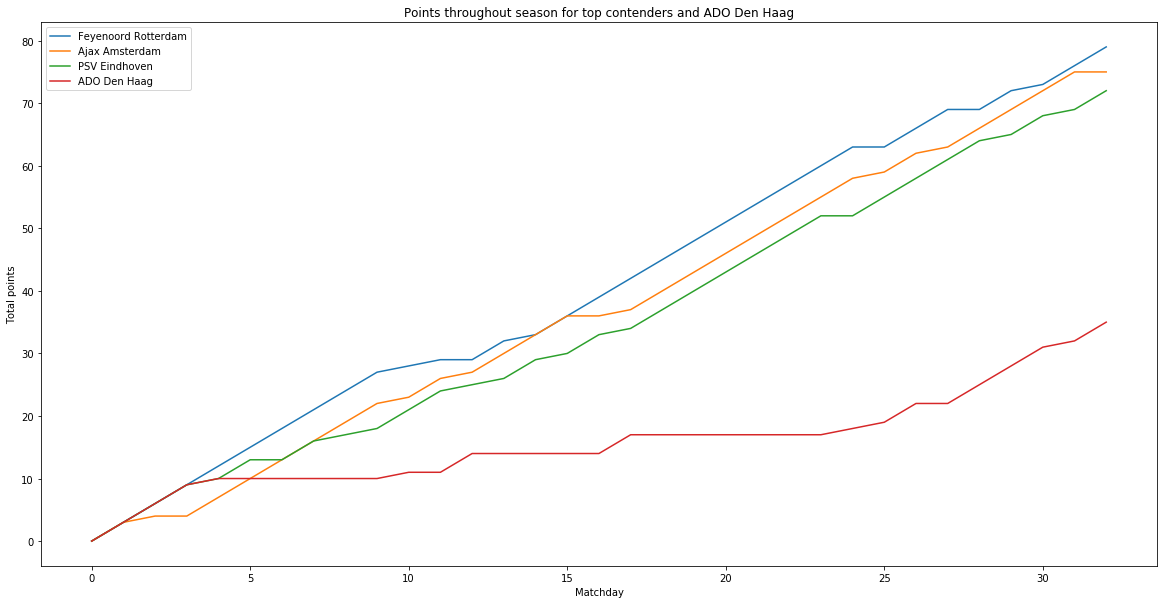

In [92]:
import matplotlib.pyplot as plt

#used docs on line chart : https://matplotlib.org/users/pyplot_tutorial.html
# also: http://mple.m-artwork.eu/tutorial

plt.figure(figsize=(20,10)) 
l_h =[]
for team in ['Feyenoord Rotterdam', 'Ajax Amsterdam', 'PSV Eindhoven','ADO Den Haag']:
    h, = plt.plot(all_standings[all_standings['teamName']==team]['matchDay']
                 ,all_standings[all_standings['teamName']==team]['points']
                ,label=team)
    l_h.append(h)
plt.legend(handles=l_h)
plt.ylabel('Total points')
plt.xlabel('Matchday')
plt.title('Points throughout season for top contenders and ADO Den Haag')
plt.show()


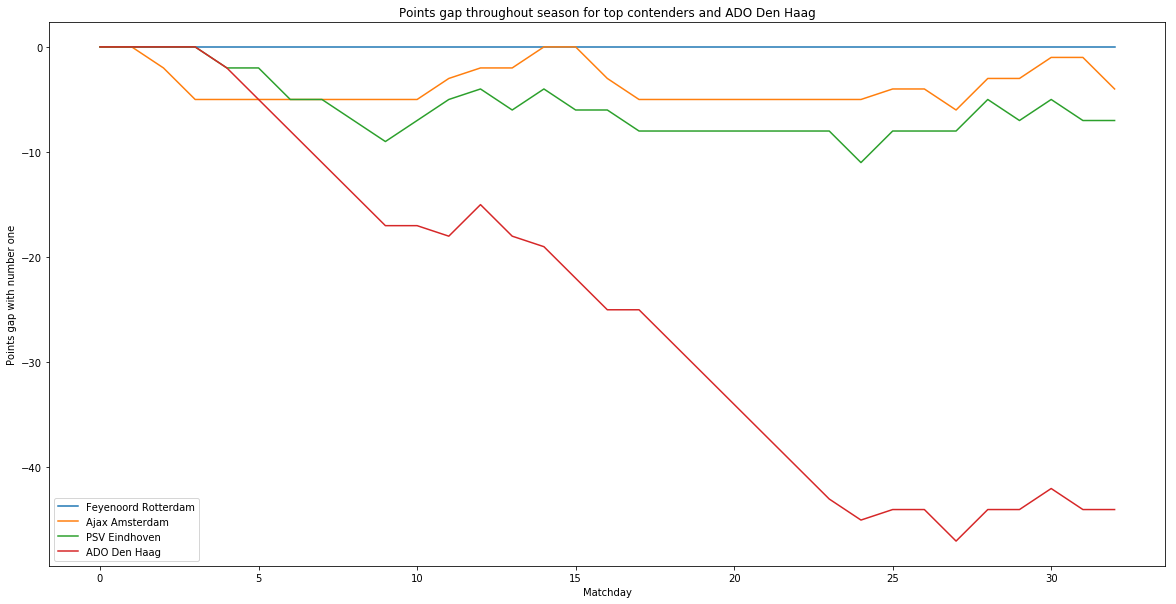

In [93]:
#pointsgap
plt.figure(figsize=(20,10)) 
l_h =[]
for team in ['Feyenoord Rotterdam', 'Ajax Amsterdam', 'PSV Eindhoven','ADO Den Haag']:
    h, = plt.plot(all_standings[all_standings['teamName']==team]['matchDay']
                 ,all_standings[all_standings['teamName']==team]['pointsGap']
                ,label=team)
    l_h.append(h)
plt.legend(handles=l_h)
plt.ylabel('Points gap with number one')
plt.xlabel('Matchday')
plt.title('Points gap throughout season for top contenders and ADO Den Haag')
plt.show()

Combine fixtures and standings - add points difference between teams in fixture

In [113]:
def points_for_team(team, matchday):
  return all_standings[(all_standings['teamName']==team) & (all_standings['matchDay']==matchday) ].iloc[0]['points']

def pointsgap(fixture):
  print('matchday ='+str(fixture['matchday'])) 
  if (fixture['matchday'] > 32):
      return 0
  else:     
    #note: the pointsgap prior to fixture is calculated using the points from (after) the previous matchday    
    points_home= points_for_team(fixture['homeTeamName'],fixture['matchday']-1);
    points_away= points_for_team(fixture['awayTeamName'],fixture['matchday']-1);
    print(points_home)
    return points_home - points_away



49

In [114]:
# add column priorPointsGap to the fixtures dataframe to hold te gap in points between the two teams, as existed just prior to the fixture
fixtures['priorPointsGap'] = fixtures.apply(pointsgap, axis=1)
#fixtures.head(30)

matchday =1
0
matchday =1
0
matchday =1
0
matchday =1
0
matchday =1
0
matchday =1
0
matchday =1
0
matchday =1
0
matchday =1
0
matchday =2
1
matchday =2
3
matchday =2
3
matchday =2
3
matchday =2
1
matchday =2
1
matchday =2
0
matchday =2
3
matchday =2
3
matchday =3
6
matchday =3
2
matchday =3
1
matchday =3
4
matchday =3
2
matchday =3
0
matchday =3
1
matchday =3
3
matchday =3
4
matchday =4
6
matchday =4
3
matchday =4
2
matchday =4
9
matchday =4
3
matchday =4
9
matchday =4
1
matchday =4
9
matchday =4
4
matchday =5
1
matchday =5
7
matchday =5
5
matchday =5
5
matchday =5
6
matchday =5
12
matchday =5
1
matchday =5
1
matchday =5
7
matchday =6
3
matchday =6
6
matchday =6
7
matchday =6
3
matchday =6
4
matchday =6
7
matchday =6
2
matchday =6
13
matchday =6
5
matchday =7
10
matchday =7
5
matchday =7
13
matchday =7
10
matchday =7
13
matchday =7
5
matchday =7
3
matchday =7
9
matchday =7
18
matchday =8
2
matchday =8
10
matchday =8
14
matchday =8
3
matchday =8
5
matchday =8
16
matchday =8
6
matchday =

,_links,awayTeamName,date,homeTeamName,matchday,odds,result,status,real_timestamp,weekday,...,halfTime,outcome,Capacity,City,Lattitude,Longitude,Name,PitchType,Team,priorPointsGap
0,{'self': {'href': 'http://api.football-data.or...,PEC Zwolle,2016-08-05T18:00:00Z,NEC Nijmegen,1,"{'homeWin': 2.15, 'draw': 3.4, 'awayWin': 2.8}","{'goalsHomeTeam': 1, 'goalsAwayTeam': 1, 'half...",FINISHED,2016-08-05 18:00:00,4,...,"{'goalsHomeTeam': 0, 'goalsAwayTeam': 1}",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,{'self': {'href': 'http://api.football-data.or...,Go Ahead Eagles Deventer,2016-08-06T16:30:00Z,ADO Den Haag,1,"{'homeWin': 1.53, 'draw': 3.75, 'awayWin': 5.0}","{'goalsHomeTeam': 3, 'goalsAwayTeam': 0, 'half...",FINISHED,2016-08-06 16:30:00,5,...,"{'goalsHomeTeam': 1, 'goalsAwayTeam': 0}",1,15000.0,Den Haag,52.062934,4.380538,Kyocera-stadion,Synthetic,ADO Den Haag,0
2,{'self': {'href': 'http://api.football-data.or...,Excelsior,2016-08-06T17:45:00Z,FC Twente Enschede,1,"{'homeWin': 1.66, 'draw': 3.6, 'awayWin': 4.2}","{'goalsHomeTeam': 1, 'goalsAwayTeam': 2, 'half...",FINISHED,2016-08-06 17:45:00,5,...,"{'goalsHomeTeam': 0, 'goalsAwayTeam': 1}",2,30205.0,Enschede,52.236535,6.835670,De Grolsch Veste,Natural,FC Twente Enschede,0
3,{'self': {'href': 'http://api.football-data.or...,PSV Eindhoven,2016-08-06T17:45:00Z,FC Utrecht,1,"{'homeWin': 3.5, 'draw': 3.5, 'awayWin': 1.83}","{'goalsHomeTeam': 1, 'goalsAwayTeam': 2, 'half...",FINISHED,2016-08-06 17:45:00,5,...,"{'goalsHomeTeam': 1, 'goalsAwayTeam': 0}",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,{'self': {'href': 'http://api.football-data.or...,Vitesse Arnhem,2016-08-06T18:45:00Z,Willem II Tilburg,1,None,"{'goalsHomeTeam': 1, 'goalsAwayTeam': 4, 'half...",FINISHED,2016-08-06 18:45:00,5,...,"{'goalsHomeTeam': 0, 'goalsAwayTeam': 4}",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,{'self': {'href': 'http://api.football-data.or...,Feyenoord Rotterdam,2016-08-07T10:30:00Z,FC Groningen,1,"{'homeWin': 3.1, 'draw': 3.3, 'awayWin': 2.0}","{'goalsHomeTeam': 0, 'goalsAwayTeam': 5, 'half...",FINISHED,2016-08-07 10:30:00,6,...,"{'goalsHomeTeam': 0, 'goalsAwayTeam': 3}",2,22579.0,Groningen,53.206787,6.589806,Euroborg,Natural,FC Groningen,0
6,{'self': {'href': 'http://api.football-data.or...,SC Heerenveen,2016-08-07T12:30:00Z,AZ Alkmaar,1,"{'homeWin': 1.57, 'draw': 3.9, 'awayWin': 4.5}","{'goalsHomeTeam': 2, 'goalsAwayTeam': 2, 'half...",FINISHED,2016-08-07 12:30:00,6,...,"{'goalsHomeTeam': 1, 'goalsAwayTeam': 1}",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,{'self': {'href': 'http://api.football-data.or...,Ajax Amsterdam,2016-08-07T12:30:00Z,Sparta Rotterdam,1,"{'homeWin': 7.0, 'draw': 4.4, 'awayWin': 1.35}","{'goalsHomeTeam': 1, 'goalsAwayTeam': 3, 'half...",FINISHED,2016-08-07 12:30:00,6,...,"{'goalsHomeTeam': 1, 'goalsAwayTeam': 1}",2,11000.0,Rotterdam,51.919956,4.430850,Sparta-Stadion Het Kasteel,Synthetic,Sparta Rotterdam,0
8,{'self': {'href': 'http://api.football-data.or...,Heracles Almelo,2016-08-07T14:45:00Z,Roda JC Kerkrade,1,"{'homeWin': 2.3, 'draw': 3.3, 'awayWin': 3.1}","{'goalsHomeTeam': 1, 'goalsAwayTeam': 1, 'half...",FINISHED,2016-08-07 14:45:00,6,...,"{'goalsHomeTeam': 0, 'goalsAwayTeam': 1}",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,{'self': {'href': 'http://api.football-data.or...,FC Utrecht,2016-08-12T18:00:00Z,SC Heerenveen,2,None,"{'goalsHomeTeam': 2, 'goalsAwayTeam': 2, 'half...",FINISHED,2016-08-12 18:00:00,4,...,"{'goalsHomeTeam': 1, 'goalsAwayTeam': 2}",3,261000.0,Heerenveen,52.958743,5.933824,Abe Lenstra Stadion,Natural,SC Heerenveen,1
